<a href="https://colab.research.google.com/github/Pranav2092/Pytorch-Practice/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a mdel class that inherits nn.Module
class Model(nn.Module):
  def __init__(self,in_features=4,h1=100,h2=75,h3=50,h4=25,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h4,out_features)

  def forward(self,x):
    x = f.tanh(self.fc1(x))
    x = f.tanh(self.fc2(x))
    x = f.sigmoid(self.fc3(x))
    x = f.relu(self.fc4(x))
    x = self.out(x)
    return x


In [3]:
# Pich a manual seed for randomization
torch.manual_seed(92)
# Create an instance of model
model = Model()

In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Change last column from string to ints
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-39309352.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# Train Test split X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [7]:
# Convert to numpy arrays
X = X.values
y = y.values

In [8]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=92)

In [9]:
# Convert features X and labels y to float and long torch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
# Set the criterion of model to measure the error, how far off the prediction are from the data

criterion = nn.CrossEntropyLoss()

#Choose an optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations(epochs), lower our learning rate)

optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [11]:
# Train our model
#Epochs = one run thru all the training data in our model

epochs = 3000
losses = []
for epoch in range(epochs):
  model.train()
  y_pred = model.forward(X_train) # get predicted results
  # measure loss/error,high at first
  loss = criterion(y_pred,y_train)

  # Keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")

  # Zero out gradients
  optimizer.zero_grad()

  # Calculate gradients
  loss.backward()

  # Adjust weights
  optimizer.step()


Epoch: 0, Loss: 1.1201249361038208
Epoch: 10, Loss: 1.1109287738800049
Epoch: 20, Loss: 1.103607416152954
Epoch: 30, Loss: 1.0988624095916748
Epoch: 40, Loss: 1.0947571992874146
Epoch: 50, Loss: 1.0907670259475708
Epoch: 60, Loss: 1.0867494344711304
Epoch: 70, Loss: 1.0823527574539185
Epoch: 80, Loss: 1.0773594379425049
Epoch: 90, Loss: 1.0714728832244873
Epoch: 100, Loss: 1.0643658638000488
Epoch: 110, Loss: 1.054487943649292
Epoch: 120, Loss: 1.043357491493225
Epoch: 130, Loss: 1.0297645330429077
Epoch: 140, Loss: 1.0134626626968384
Epoch: 150, Loss: 0.9943825006484985
Epoch: 160, Loss: 0.9723080992698669
Epoch: 170, Loss: 0.9473673105239868
Epoch: 180, Loss: 0.9205254912376404
Epoch: 190, Loss: 0.892195463180542
Epoch: 200, Loss: 0.863163948059082
Epoch: 210, Loss: 0.8344932794570923
Epoch: 220, Loss: 0.806719183921814
Epoch: 230, Loss: 0.7802324891090393
Epoch: 240, Loss: 0.7554222941398621
Epoch: 250, Loss: 0.7325238585472107
Epoch: 260, Loss: 0.711773157119751
Epoch: 270, Loss: 0

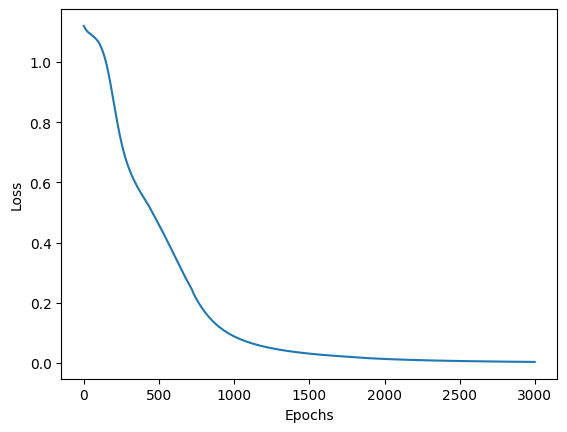

In [12]:
# Graph it out
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()